## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128], regul=l1, regul_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(
                units=n_units, activation='relu', name='hidden_layer'+str(i+1), 
                kernel_regularizer=regul(regul_ratio))(input_layer)
        else:
            x = keras.layers.Dense(
                units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                kernel_regularizer=regul(regul_ratio))(x)
            
        out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [26]:
"""Code Here
設定超參數
"""
BATCH_SIZE = 256
EPOCHS = 50
LR = 1e-4
MOMENTUM = 0.95
REGULIZER=[l1, l1_l2]
REGULIZER_RATE = [1e-4,1e-8]

In [27]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regul in REGULIZER:
    for regul_ratio in REGULIZER_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Regulizer = %s / Experiment with Regulizer = %.6f" % (regul, regul_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], regul=regul, regul_ratio=regul_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LR, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-%s-%s" % (str(regul), str(regul_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Regulizer = <function l1 at 0x0000027494AD72F0> / Experiment with Regulizer = 0.000100
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, vali

50000/50000 [==============================] - 7s 149us/step - loss: 5.2727 - accuracy: 0.4495 - val_loss: 5.2817 - val_accuracy: 0.4452
Epoch 49/50
50000/50000 [==============================] - 7s 149us/step - loss: 5.2627 - accuracy: 0.4512 - val_loss: 5.2717 - val_accuracy: 0.4429
Epoch 50/50
50000/50000 [==============================] - 8s 150us/step - loss: 5.2522 - accuracy: 0.4529 - val_loss: 5.2623 - val_accuracy: 0.4466
Regulizer = <function l1 at 0x0000027494AD72F0> / Experiment with Regulizer = 0.000000
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    

50000/50000 [==============================] - 7s 147us/step - loss: 1.5732 - accuracy: 0.4524 - val_loss: 1.5891 - val_accuracy: 0.4429
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5688 - accuracy: 0.4546 - val_loss: 1.5872 - val_accuracy: 0.4438
Epoch 47/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5647 - accuracy: 0.4569 - val_loss: 1.5792 - val_accuracy: 0.4465
Epoch 48/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5599 - accuracy: 0.4570 - val_loss: 1.5776 - val_accuracy: 0.4483
Epoch 49/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5556 - accuracy: 0.4594 - val_loss: 1.5732 - val_accuracy: 0.4452
Epoch 50/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5514 - accuracy: 0.4608 - val_loss: 1.5708 - val_accuracy: 0.4477
Regulizer = <function l1_l2 at 0x0000027494AD76A8> / Experiment with Regulizer = 0.000100
Model: "model_3"
___________

Epoch 42/50
50000/50000 [==============================] - 8s 164us/step - loss: 10.9246 - accuracy: 0.4144 - val_loss: 10.8533 - val_accuracy: 0.4126
Epoch 43/50
50000/50000 [==============================] - 8s 164us/step - loss: 10.7750 - accuracy: 0.4158 - val_loss: 10.7051 - val_accuracy: 0.4157
Epoch 44/50
50000/50000 [==============================] - 8s 164us/step - loss: 10.6279 - accuracy: 0.4168 - val_loss: 10.5590 - val_accuracy: 0.4146
Epoch 45/50
50000/50000 [==============================] - 9s 171us/step - loss: 10.4837 - accuracy: 0.4170 - val_loss: 10.4167 - val_accuracy: 0.4128
Epoch 46/50
50000/50000 [==============================] - 8s 166us/step - loss: 10.3417 - accuracy: 0.4193 - val_loss: 10.2767 - val_accuracy: 0.4150
Epoch 47/50
50000/50000 [==============================] - 8s 164us/step - loss: 10.2018 - accuracy: 0.4190 - val_loss: 10.1358 - val_accuracy: 0.4161
Epoch 48/50
50000/50000 [==============================] - 8s 164us/step - loss: 10.0635 - acc

Epoch 39/50
50000/50000 [==============================] - 9s 171us/step - loss: 9.3772 - accuracy: 0.4078 - val_loss: 9.3215 - val_accuracy: 0.4062
Epoch 40/50
50000/50000 [==============================] - 8s 160us/step - loss: 9.2577 - accuracy: 0.4076 - val_loss: 9.2018 - val_accuracy: 0.4113
Epoch 41/50
50000/50000 [==============================] - 8s 160us/step - loss: 9.1403 - accuracy: 0.4105 - val_loss: 9.0867 - val_accuracy: 0.4071
Epoch 42/50
50000/50000 [==============================] - 8s 160us/step - loss: 9.0244 - accuracy: 0.4115 - val_loss: 8.9713 - val_accuracy: 0.4065
Epoch 43/50
50000/50000 [==============================] - 8s 160us/step - loss: 8.9105 - accuracy: 0.4119 - val_loss: 8.8571 - val_accuracy: 0.4130
Epoch 44/50
50000/50000 [==============================] - 8s 160us/step - loss: 8.7985 - accuracy: 0.4133 - val_loss: 8.7473 - val_accuracy: 0.4130
Epoch 45/50
50000/50000 [==============================] - 8s 160us/step - loss: 8.6885 - accuracy: 0.4141

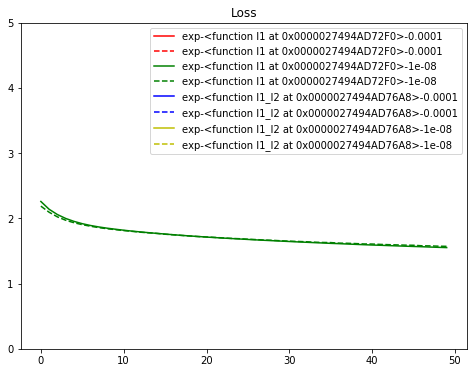

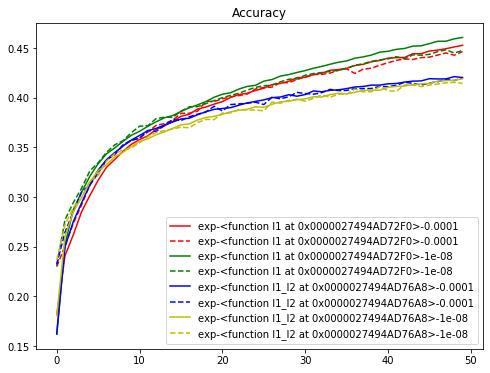

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()